Shakshi Singh Rajput

U21EC138

AIM: To study and implement the logistic regression algorithm with 
and without using inbuilt library..

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
dataset = pd.read_csv('suv_data.csv')
print(dataset.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [6]:
X = dataset[['Age', 'EstimatedSalary']].values
y = dataset['Purchased'].values


In [7]:
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]



In [8]:
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Prevent overflow in exp
    return 1 / (1 + np.exp(-z))

without using sklearn

In [9]:
m, n = X_train.shape
w = np.zeros(n)  # Initialize weights
b = 0  # Initialize bias
learning_rate = 0.001  # learning rate
epochs = 1000

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Generate synthetic binary classification data (X_train and y_train already available)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train logistic regression model using sklearn
model = LogisticRegression(max_iter=500)  # Set the number of epochs (iterations)
model.fit(X_train_scaled, y_train)  # Fit the model on the training data

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the learned weights and bias (coefficients and intercept)
print(f'Weights (w): {model.coef_}')
print(f'Bias (b): {model.intercept_}')


Accuracy: 0.75
Weights (w): [[1.74601051 1.22971937]]
Bias (b): [-1.53132525]


In [11]:
y_pred_test = sigmoid(np.dot(X_test, w) + b)
y_pred_test_binary = [1 if i > 0.5 else 0 for i in y_pred_test]

In [12]:
print(f'Final values - w: {w}, b: {b}')

Final values - w: [0. 0.], b: 0


In [13]:
accuracy = np.mean(y_pred_test_binary == y_test)
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

Accuracy on the test set: 36.25%


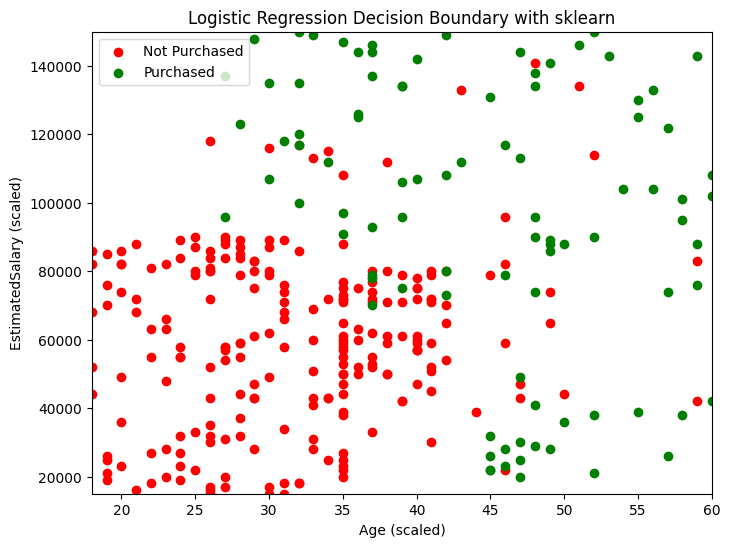

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Not Purchased')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='green', label='Purchased')

# Create a meshgrid to plot the decision boundary
x_values = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
y_values = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100)
xx, yy = np.meshgrid(x_values, y_values)

# Compute the linear model values for the grid points
Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)
Z = Z.reshape(xx.shape)

# Plot the decision boundary (contour where Z=0.5)
plt.contour(xx, yy, Z, levels=[0.5], colors='blue')

# Add labels and legends
plt.title('Logistic Regression Decision Boundary with sklearn')
plt.xlabel('Age (scaled)')
plt.ylabel('EstimatedSalary (scaled)')
plt.legend()
plt.show()

without sklearn

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]


In [17]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate some synthetic binary classification data (2 features for X)

# Hyperparameters
epochs = 1000
learning_rate = 0.01
m, n = X_train.shape  # Number of samples and features
w = np.zeros(n)  # Initialize weight vector
b = 0  # Initialize bias

# Logistic regression training loop
for epoch in range(epochs):
    # Compute the linear combination wx + b
    linear_model = np.dot(X_train, w) + b

    # Apply the sigmoid function to get y_pred
    y_pred = sigmoid(linear_model)

    # Clip y_pred to avoid log(0)
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)

    # Compute the binary cross-entropy loss
    loss = -(1/m) * np.sum(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred))

    # Compute gradients
    dw = (1/m) * np.dot(X_train.T, (y_pred - y_train))  # Gradient w.r.t. weights
    db = (1/m) * np.sum(y_pred - y_train)  # Gradient w.r.t. bias

    # Gradient clipping (to avoid large gradients)
    dw = np.clip(dw, -5, 5)
    db = np.clip(db, -5, 5)

    # Update weights and bias
    w -= learning_rate * dw
    b -= learning_rate * db

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

Epoch 0, Loss: 0.6931471805599454
Epoch 100, Loss: 0.70204426689742
Epoch 200, Loss: 0.7088860550946281
Epoch 300, Loss: 0.7151119138257696
Epoch 400, Loss: 0.7207533008397502
Epoch 500, Loss: 0.7258471990088744
Epoch 600, Loss: 0.73043334966148
Epoch 700, Loss: 0.7345522974554922
Epoch 800, Loss: 0.7382440428065896


C:\Users\Aryan Saxena\AppData\Local\Temp\ipykernel_12784\2648423546.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Epoch 900, Loss: 0.7415471440141022


In [18]:
print(f'Final values - w: {w}, b: {b}')

Final values - w: [0.00028125 0.        ], b: 0.207333613001855


In [19]:
accuracy = np.mean(y_pred_test_binary == y_test)
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

Accuracy on the test set: 36.25%


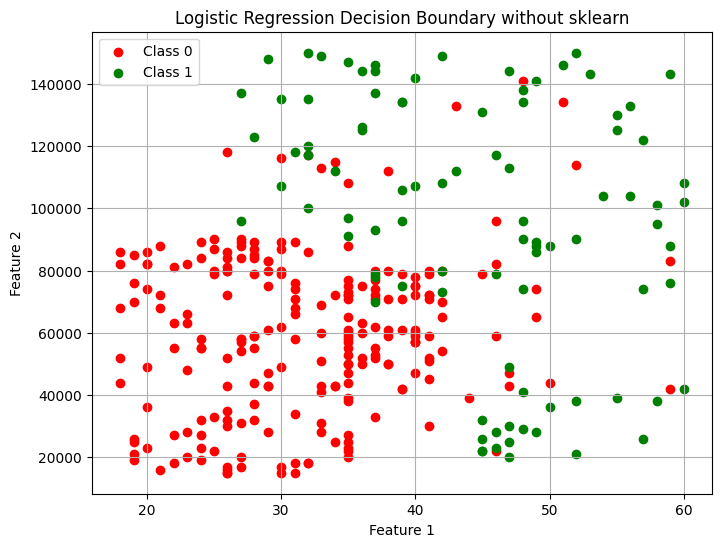

In [20]:

# Plot the decision boundary and the data points
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='green', label='Class 1')

# Create a meshgrid to plot the decision boundary
x_values = np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100)
y_values = np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 100)
xx, yy = np.meshgrid(x_values, y_values)

def plot_decision_boundary(X, y, model):
    # Set min and max values for X and add some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the label for every point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, levels=[0, 0.5, 1], cmap='coolwarm')

# Add labels and legends
plt.title('Logistic Regression Decision Boundary without sklearn')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Conclusion:

Studying and implementing logistic regression both with and without inbuilt libraries enhances understanding of its mechanics. Using libraries like scikit-learn simplifies application, while a custom implementation deepens knowledge of the algorithm's mathematical foundations, such as the cost function and gradient descent. This approach strengthens both theoretical and practical skills in machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# 1. Load the dataset
data = pd.read_csv('/mnt/data/suv_data.csv')

# 2. Data Preprocessing
# Encode the categorical 'Gender' column
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Male = 1, Female = 0

# Separate features and target variable
X = data[['Gender', 'Age', 'EstimatedSalary']].values
y = data['Purchased'].values

# 3. Visualize Dataset (Age vs Estimated Salary colored by Purchase)
plt.figure(figsize=(10, 6))
plt.scatter(data[data['Purchased'] == 0]['Age'], 
            data[data['Purchased'] == 0]['EstimatedSalary'], 
            color='blue', label='Not Purchased')
plt.scatter(data[data['Purchased'] == 1]['Age'], 
            data[data['Purchased'] == 1]['EstimatedSalary'], 
            color='red', label='Purchased')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Age vs Estimated Salary (Purchase Status)')
plt.legend()
plt.show()

# 4. Split Dataset into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Logistic Regression using sklearn
model = LogisticRegression()
model.fit(X_train, y_train)

# 6. Predict and Evaluate
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 7. Visualize Decision Boundary (Age vs Estimated Salary)
# Note: For visualization, we use only 'Age' and 'EstimatedSalary' and set 'Gender' as constant.
age_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
salary_range = np.linspace(X[:, 2].min(), X[:, 2].max(), 100)
age_grid, salary_grid = np.meshgrid(age_range, salary_range)
grid_points = np.c_[np.ones(age_grid.ravel().shape) * 1, age_grid.ravel(), salary_grid.ravel()]  # Assuming 'Gender' as 1 (Male)

pred_grid = model.predict(grid_points).reshape(age_grid.shape)

plt.figure(figsize=(10, 6))
plt.contourf(age_grid, salary_grid, pred_grid, alpha=0.3, cmap='coolwarm')
plt.scatter(data[data['Purchased'] == 0]['Age'], data[data['Purchased'] == 0]['EstimatedSalary'], color='blue', label='Not Purchased')
plt.scatter(data[data['Purchased'] == 1]['Age'], data[data['Purchased'] == 1]['EstimatedSalary'], color='red', label='Purchased')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Decision Boundary (Logistic Regression)')
plt.legend()
plt.show()

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load the dataset
data = pd.read_csv('suv_data.csv')

# 2. Data Preprocessing
# Encode the categorical 'Gender' column
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Male = 1, Female = 0

# Separate features and target variable
X = data[['Gender', 'Age', 'EstimatedSalary']].values
y = data['Purchased'].values

# 3. Split Dataset into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Logistic Regression from scratch
class LogisticRegressionScratch:
    def _init_(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n, m = X.shape
        self.w = np.zeros(m)
        self.b = 0
        
        for epoch in range(self.epochs):
            # Compute the linear model
            linear_model = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(linear_model)
            
            # Compute gradients
            dw = (1 / n) * np.dot(X.T, (y_pred - y))
            db = (1 / n) * np.sum(y_pred - y)
            
            # Update weights and bias
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db
            
            # Print loss for every 100 epochs
            if epoch % 100 == 0:
                loss = -(1 / n) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
                print(f'Epoch {epoch}: Loss = {loss}')

    def predict(self, X):
        linear_model = np.dot(X, self.w) + self.b
        y_pred = self.sigmoid(linear_model)
        y_pred_classes = [1 if i > 0.5 else 0 for i in y_pred]
        return np.array(y_pred_classes)

# 5. Train the model
model_scratch = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
model_scratch.fit(X_train, y_train)

# 6. Make predictions
y_pred_scratch = model_scratch.predict(X_test)

# Print evaluation metrics
print("Accuracy (Scratch):", accuracy_score(y_test, y_pred_scratch))
print("Confusion Matrix (Scratch):\n", confusion_matrix(y_test, y_pred_scratch))
print("Classification Report (Scratch):\n", classification_report(y_test, y_pred_scratch))

# 7. Visualize Decision Boundary
age_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
salary_range = np.linspace(X[:, 2].min(), X[:, 2].max(), 100)
age_grid, salary_grid = np.meshgrid(age_range, salary_range)
grid_points = np.c_[np.ones(age_grid.ravel().shape) * 1, age_grid.ravel(), salary_grid.ravel()]  # Assuming 'Gender' as 1 (Male)

pred_grid = model_scratch.predict(grid_points).reshape(age_grid.shape)

plt.figure(figsize=(10, 6))
plt.contourf(age_grid, salary_grid, pred_grid, alpha=0.3, cmap='coolwarm')
plt.scatter(data[data['Purchased'] == 0]['Age'], data[data['Purchased'] == 0]['EstimatedSalary'], color='blue', label='Not Purchased')
plt.scatter(data[data['Purchased'] == 1]['Age'], data[data['Purchased'] == 1]['EstimatedSalary'], color='red', label='Purchased')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Decision Boundary (Logistic Regression from Scratch)')
plt.legend()
plt.show()

TypeError: LogisticRegressionScratch() takes no arguments